In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv(r"HR_Analytics.csv")

In [3]:
# Basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

In [4]:
# Checking for missing values
print(df.isnull().sum())

EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
Training

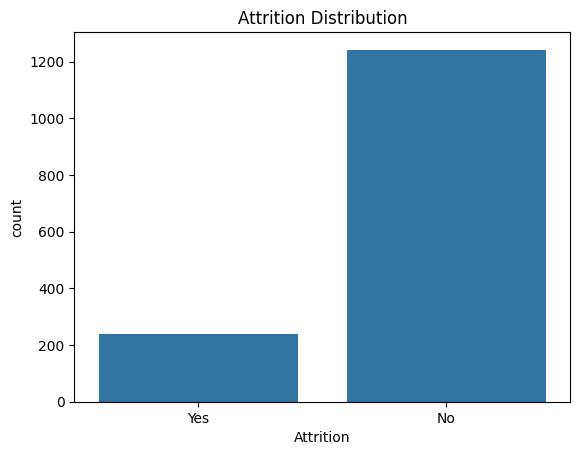

In [5]:
# Target variable distribution
sns.countplot(data=df, x='Attrition')
plt.title("Attrition Distribution")
plt.show()

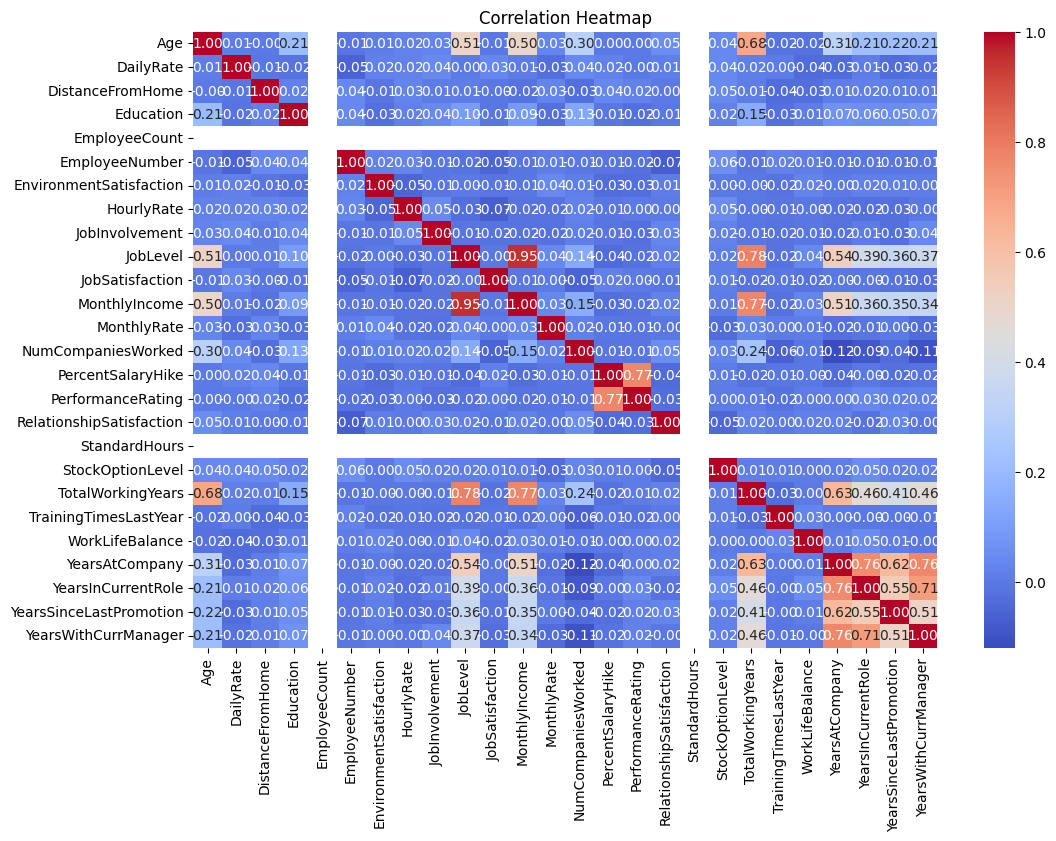

In [6]:
# Correlation heatmap (numeric features)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [8]:
# Impute missing values(filling in the missing data in a dataset)
imputer = SimpleImputer(strategy='median')
df['YearsWithCurrManager'] = imputer.fit_transform(df[['YearsWithCurrManager']])

In [9]:
# Encode categorical columns(converting non-numeric (categorical) data into numerical format)
df_encoded = df.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

In [10]:
# Defining features and target
X = df_encoded.drop(columns=['EmpID', 'Attrition'])
y = df_encoded['Attrition']

In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
# Predictions
y_pred_logreg = logreg.predict(X_test)

In [15]:
# Evaluation - Logistic Regression
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       249
           1       0.56      0.19      0.29        47

    accuracy                           0.85       296
   macro avg       0.71      0.58      0.60       296
weighted avg       0.82      0.85      0.82       296

Confusion Matrix:
 [[242   7]
 [ 38   9]]


In [16]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [17]:
y_pred_tree = tree.predict(X_test)

In [18]:
# Evaluation - Decision Tree
print("Decision Tree Report:\n", classification_report(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))

Decision Tree Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.86       249
           1       0.32      0.43      0.37        47

    accuracy                           0.77       296
   macro avg       0.60      0.63      0.61       296
weighted avg       0.80      0.77      0.78       296

Confusion Matrix:
 [[207  42]
 [ 27  20]]


In [19]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       249
           1       1.00      0.17      0.29        47

    accuracy                           0.87       296
   macro avg       0.93      0.59      0.61       296
weighted avg       0.89      0.87      0.83       296

Confusion Matrix:
[[249   0]
 [ 39   8]]
